In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [4]:
train_data.shape

(50000, 32, 32, 3)

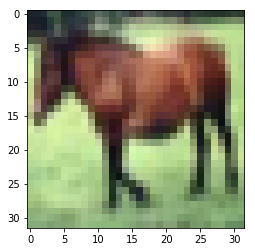

In [5]:
plt.imshow(train_data[7])

In [6]:
model = Sequential()
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())

In [7]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../checkpoints/shallow_network.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_data, train_labels, verbose=2, epochs=1000, validation_split=0.2, shuffle=True, callbacks=[es_cb, sm_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 1.64593, saving model to ../checkpoints/shallow_network.hdf5
40000/40000 - 8s - loss: 2.0640 - accuracy: 0.3242 - val_loss: 1.6459 - val_accuracy: 0.3986
Epoch 2/1000

Epoch 00002: val_loss improved from 1.64593 to 1.45694, saving model to ../checkpoints/shallow_network.hdf5
40000/40000 - 6s - loss: 1.5242 - accuracy: 0.4525 - val_loss: 1.4569 - val_accuracy: 0.4827
Epoch 3/1000

Epoch 00003: val_loss improved from 1.45694 to 1.35625, saving model to ../checkpoints/shallow_network.hdf5
40000/40000 - 6s - loss: 1.3653 - accuracy: 0.5157 - val_loss: 1.3562 - val_accuracy: 0.5300
Epoch 4/1000

Epoch 00004: val_loss improved from 1.35625 to 1.33558, saving model to ../checkpoints/shallow_network.hdf5
40000/40000 - 6s - loss: 1.2605 - accuracy: 0.5583 - val_loss: 1.3356 - val_accuracy: 0.5257
Epoch 5/1000

Epoch 00005: val_loss improved from 1.33558 to 1.22765, saving model to ../check

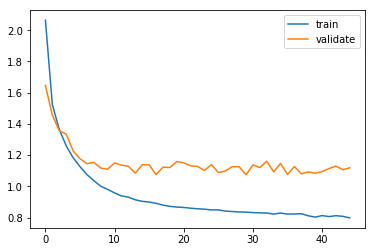

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')

In [12]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../checkpoints/shallow_network.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[1.0746202686309814, 0.6337]